# Checking if modified CAMB is functional and providing correct results

In [1]:
import camb
from camb import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["figure.dpi"] = 300
mpl.rc('axes', titlesize=12, labelsize=12)
mpl.rc('legend', fontsize=16)
#mpl.rc('xtick', labelsize=10)
#mpl.rc('ytick', labelsize=10)

# fixing comsological parameters

In [2]:
params = model.CAMBparams()
params = camb.set_params(
    H0=68.22,
    omch2=0.1179,
    ombh2=0.02256,
    tau=0.0632,
    ns=0.9743,
    As=2.13e-9,
    w = -1,
    wa=0,
    halofit_version='mead',
)

In [3]:
lcdm_results = camb.get_results(params)
lcdm_cl = lcdm_results.get_lensed_scalar_cls(CMB_unit="muK")
lcdmTT = lcdm_cl[:, 0]
lcdmEE = lcdm_cl[:, 1]
ell = np.arange(lcdmTT.shape[0])

In [4]:
params.set_dark_energy(w=-0.8, wa=-1, beta_DE=1, dark_energy_model='ppf')
cpl_results = camb.get_results(params)
cpl_cl = cpl_results.get_lensed_scalar_cls(CMB_unit="muK")
cplTT = cpl_cl[:, 0]
cplEE = cpl_cl[:, 1]

In [5]:
params.set_dark_energy(w=-0.8, wa=-1, beta_DE=-5, dark_energy_model='ppf')
lb_results = camb.get_results(params)
lb_cl = lb_results.get_lensed_scalar_cls(CMB_unit="muK")
lbTT = lb_cl[:,0]
lbEE = lb_cl[:,1]

In [6]:
params.set_dark_energy(w=-0.8, wa=-1, beta_DE=0, dark_energy_model='ppf')
log_results = camb.get_results(params)
log_cl = log_results.get_lensed_scalar_cls(CMB_unit="muK")
logTT = log_cl[:,0]
logEE = log_cl[:,1]

In [7]:
params.set_dark_energy(w=-0.8, wa=-1, beta_DE=3, dark_energy_model='ppf')
bf_results = camb.get_results(params)
bf_cl = bf_results.get_lensed_scalar_cls(CMB_unit="muK")
bfTT = bf_cl[:,0]
bfEE = bf_cl[:,1]

In [8]:
params.set_dark_energy(w=-0.8, wa=-1, beta_DE=15, dark_energy_model='ppf')
ub_results = camb.get_results(params)
ub_cl = ub_results.get_lensed_scalar_cls(CMB_unit="muK")
ubTT = ub_cl[:,0]
ubEE = ub_cl[:,1]

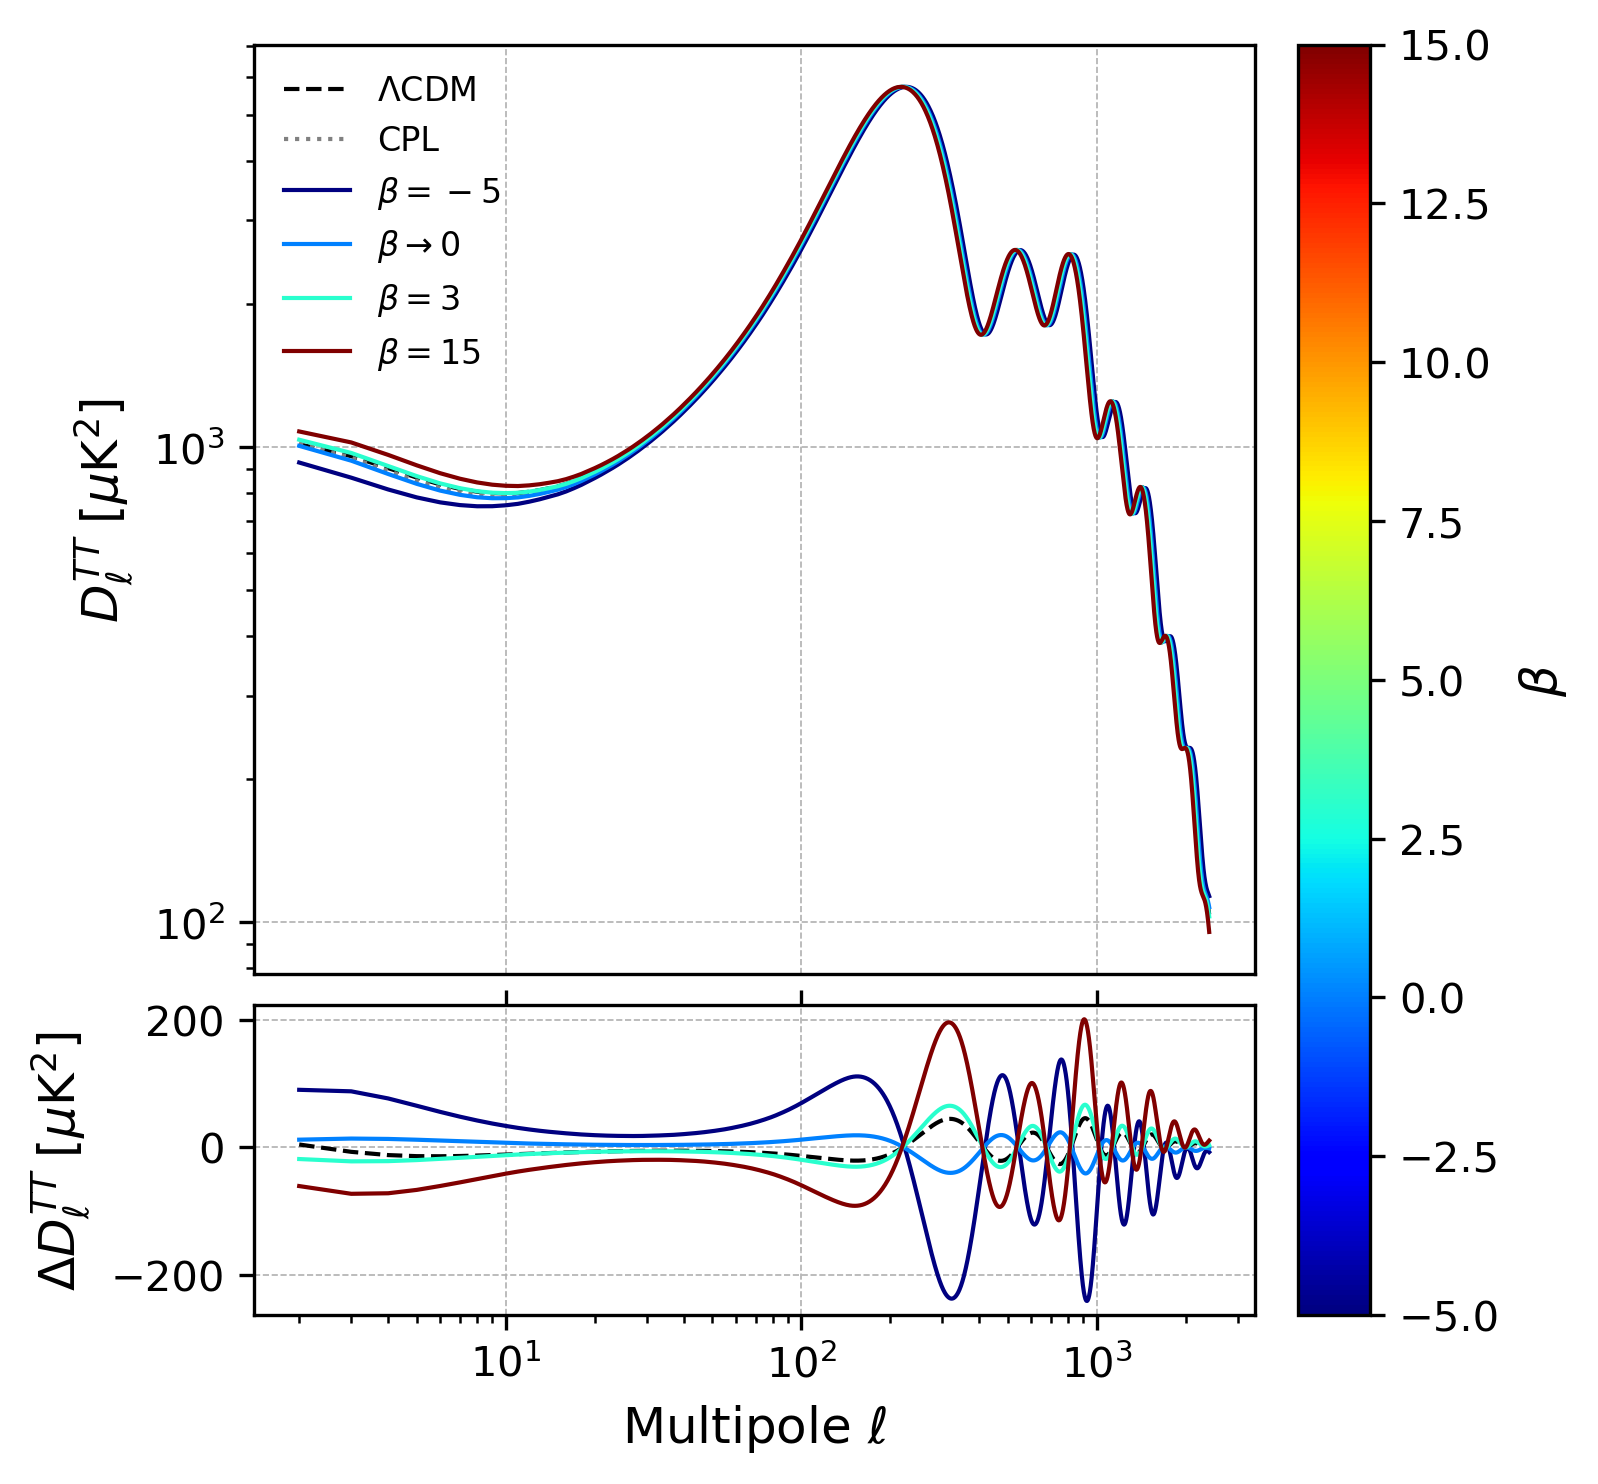

In [12]:
# --- β values and the corresponding spectra ---------------------------
betas      = [-5, 0, 3, 15]           # ↑ ordered so the colour scale is monotonic

# --- colour map --------------------------------------------------------
cmap = plt.cm.jet                # any perceptually-uniform map works
norm = mpl.colors.Normalize(vmin=min(betas), vmax=max(betas))
colours = [cmap(norm(b)) for b in betas]

# --- figure ------------------------------------------------------------
fig = plt.figure(figsize=(4.8, 5.5))        # a tad wider for the colour-bar
gs  = fig.add_gridspec(
        2, 2,
        width_ratios=[25, 1.8],             # 2nd column = colour-bar
        height_ratios=[1.5, 0.5],
        wspace=0.08, hspace=0.05            # minimal gaps
      )

ax0  = fig.add_subplot(gs[0, 0])            # main spectra
ax1  = fig.add_subplot(gs[1, 0], sharex=ax0)  # residuals
cax  = fig.add_subplot(gs[:, 1])            # ← colour-bar lives here

# --- (1) absolute TT spectra ------------------------------------------
ax0.set_xscale('log')
ax0.plot(ell[2:], lcdmTT[2:], lw=1, ls='--', color='black', label=r'$\Lambda$CDM')
ax0.plot(ell[2:], cplTT[2:], lw=1, ls=':', color='grey', label=r'CPL')
ax0.plot(ell[2:], lbTT[2:], lw=1, color=colours[0], label=r'$\beta=-5$')
ax0.plot(ell[2:], logTT[2:], lw=1, color=colours[1], label=r'$\beta\rightarrow 0$')
ax0.plot(ell[2:], bfTT[2:], lw=1, color=colours[2], label=r'$\beta=3$')
ax0.plot(ell[2:], ubTT[2:], lw=1, color=colours[3], label=r'$\beta=15$')

ax0.set_ylabel(r'$D_{\ell}^{TT}\;[\mu\mathrm{K}^2]$')
ax0.grid(ls='--', lw=0.4)
ax0.set_yscale('log')
ax0.legend(fontsize=8, frameon=False)

# suppress all x tick labels & tick-marks on the top panel
ax0.tick_params(axis='x', which='both', length=0, labelbottom=False)

# --- (2) residuals -----------------------------------------------------
ax1.set_xscale('log')
ax1.plot(ell[2:], cplTT[2:] - lcdmTT[2:], lw=1, ls='--', color='black')
ax1.plot(ell[2:], cplTT[2:] - lbTT[2:], lw=1, color=colours[0])
ax1.plot(ell[2:], cplTT[2:] - logTT[2:], lw=1, color=colours[1])
ax1.plot(ell[2:], cplTT[2:] - bfTT[2:], lw=1, color=colours[2])
ax1.plot(ell[2:], cplTT[2:] - ubTT[2:], lw=1, color=colours[3])

ax1.set_ylabel(r'$\Delta D_{\ell}^{TT}\;[\mu\mathrm{K}^2]$')
ax1.set_xlabel(r'Multipole $\ell$')
ax1.grid(ls='--', lw=0.4)
ax1.xaxis.set_tick_params(top=True)

# --- colour-bar --------------------------------------------------------
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])                         # < MPL 3.8 compat
cb = fig.colorbar(sm, cax=cax)
cb.set_label(r'$\beta$')

plt.savefig('/Users/dongha/projects/cosmo/beta_de/new/figures/tt.png', bbox_inches='tight')
plt.show()

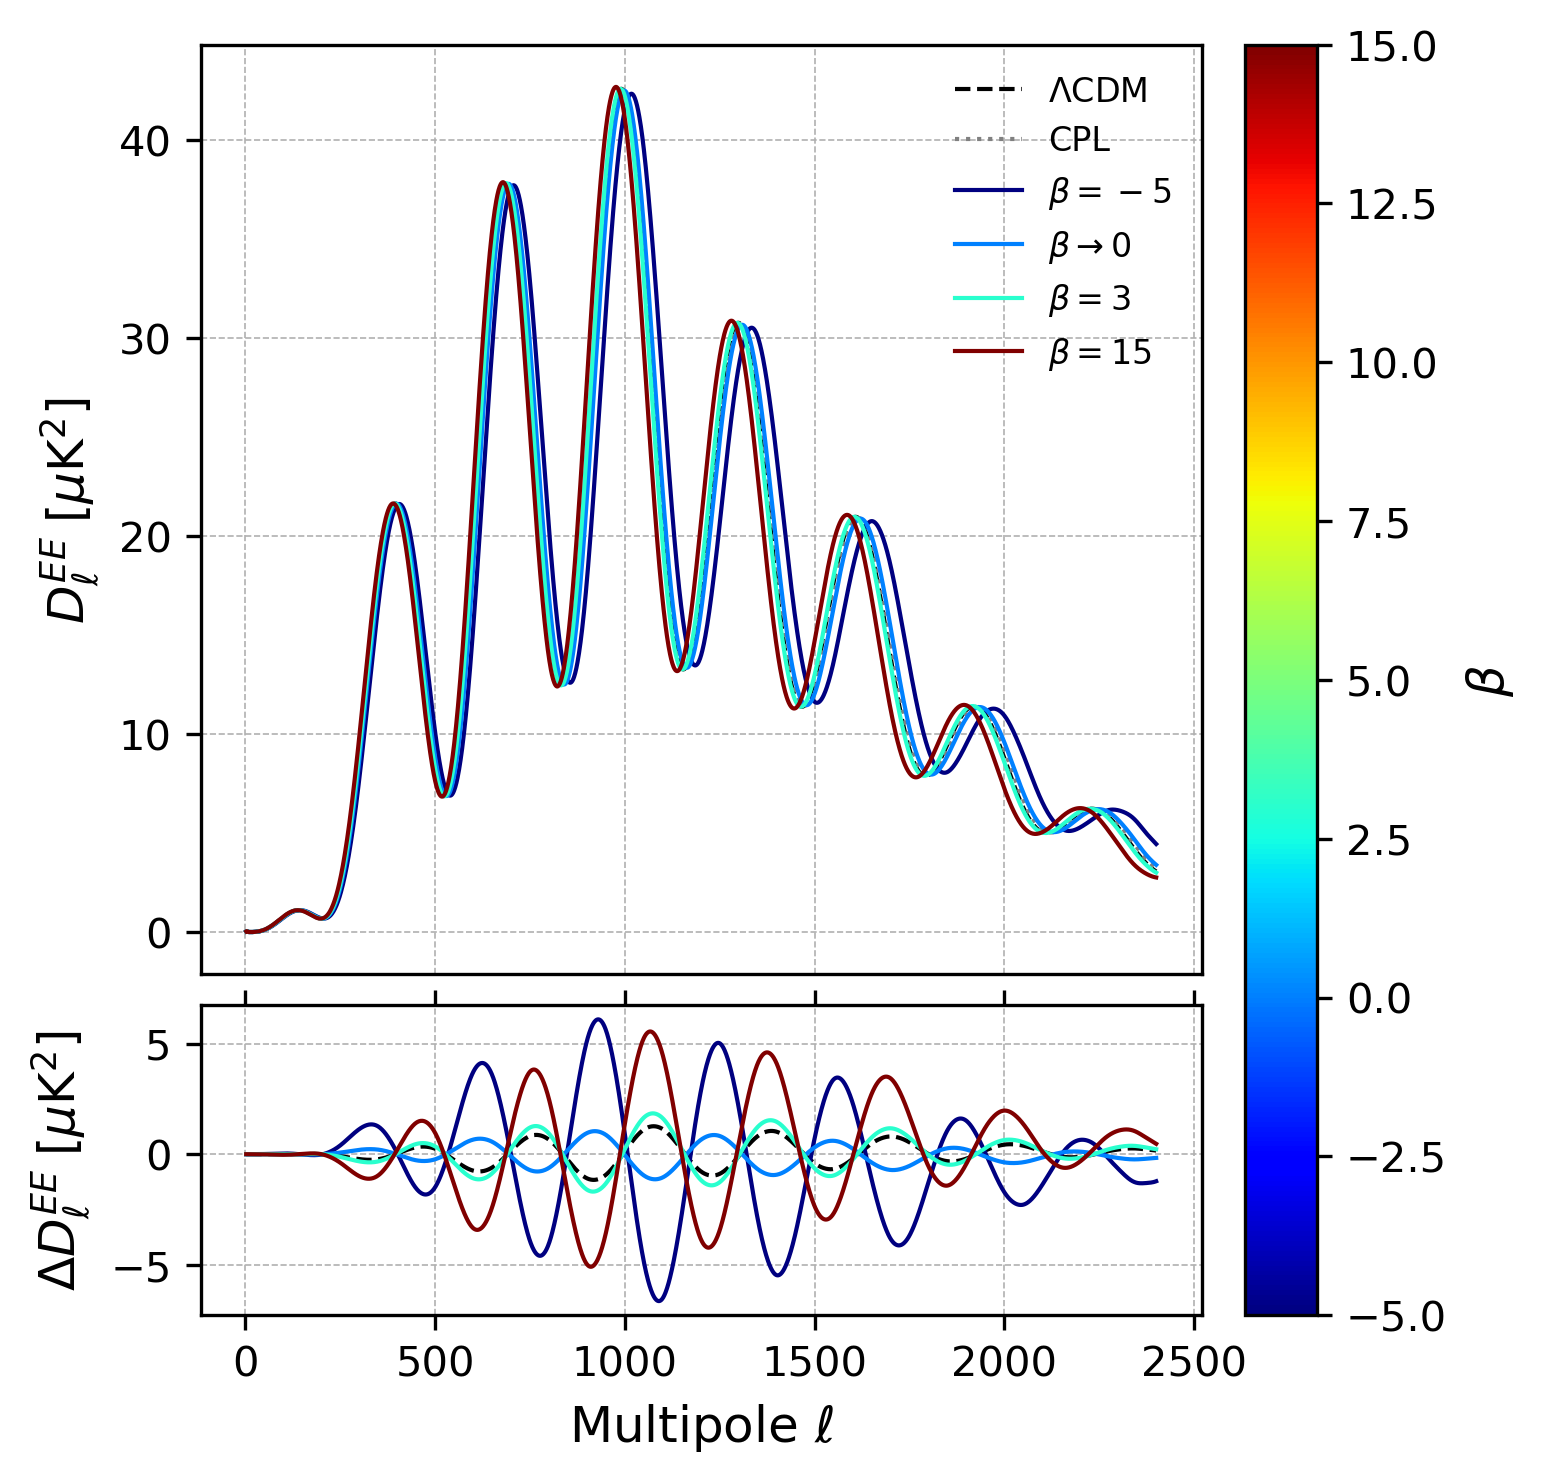

In [13]:
fig = plt.figure(figsize=(4.8, 5.5))        # a tad wider for the colour-bar
gs  = fig.add_gridspec(
        2, 2,
        width_ratios=[25, 1.8],             # 2nd column = colour-bar
        height_ratios=[1.5, 0.5],
        wspace=0.08, hspace=0.05            # minimal gaps
      )

ax0  = fig.add_subplot(gs[0, 0])            # main spectra
ax1  = fig.add_subplot(gs[1, 0], sharex=ax0)  # residuals
cax  = fig.add_subplot(gs[:, 1])            # ← colour-bar lives here

ax0.plot(ell[2:], lcdmEE[2:], lw=1, ls='--', color='black', label=r'$\Lambda$CDM')
ax0.plot(ell[2:], cplEE[2:], lw=1, ls=':', color='grey', label=r'CPL')
ax0.plot(ell[2:], lbEE[2:], lw=1, color=colours[0], label=r'$\beta=-5$')
ax0.plot(ell[2:], logEE[2:], lw=1, color=colours[1], label=r'$\beta\rightarrow 0$')
ax0.plot(ell[2:], bfEE[2:], lw=1, color=colours[2], label=r'$\beta=3$')
ax0.plot(ell[2:], ubEE[2:], lw=1, color=colours[3], label=r'$\beta=15$')

ax0.set_ylabel(r'$D_{\ell}^{EE}\;[\mu\mathrm{K}^2]$')
ax0.grid(ls='--', lw=0.4)
ax0.legend(fontsize=8, frameon=False)

# suppress all x tick labels & tick-marks on the top panel
ax0.tick_params(axis='x', which='both', length=0, labelbottom=False)

# --- (2) residuals -----------------------------------------------------
ax1.plot(ell[2:], cplEE[2:] - lcdmEE[2:], lw=1, ls='--', color='black')
ax1.plot(ell[2:], cplEE[2:] - lbEE[2:], lw=1, color=colours[0])
ax1.plot(ell[2:], cplEE[2:] - logEE[2:], lw=1, color=colours[1])
ax1.plot(ell[2:], cplEE[2:] - bfEE[2:], lw=1, color=colours[2])
ax1.plot(ell[2:], cplEE[2:] - ubEE[2:], lw=1, color=colours[3])

ax1.set_ylabel(r'$\Delta D_{\ell}^{EE}\;[\mu\mathrm{K}^2]$')
ax1.set_xlabel(r'Multipole $\ell$')
ax1.grid(ls='--', lw=0.4)
ax1.xaxis.set_tick_params(top=True)

# --- colour-bar --------------------------------------------------------
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])                         # < MPL 3.8 compat
cb = fig.colorbar(sm, cax=cax)
cb.set_label(r'$\beta$')

plt.savefig('/Users/dongha/projects/cosmo/beta_de/new/figures/ee.png', bbox_inches='tight')
plt.show()